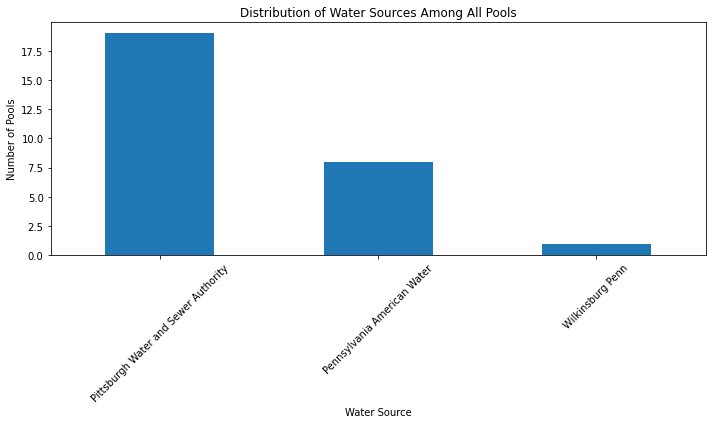

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './pittsburgh_pools.csv'
pools_data = pd.read_csv(file_path)

# for the number of each water source used in all pools
water_source_counts = pools_data['water_source'].value_counts()
plt.figure(figsize=(10, 6))
water_source_counts.plot(kind='bar')
plt.title('Distribution of Water Sources Among All Pools')
plt.xlabel('Water Source')
plt.ylabel('Number of Pools')
plt.xticks(rotation=45)  # Rotate to reead better
plt.tight_layout()
plt.show()

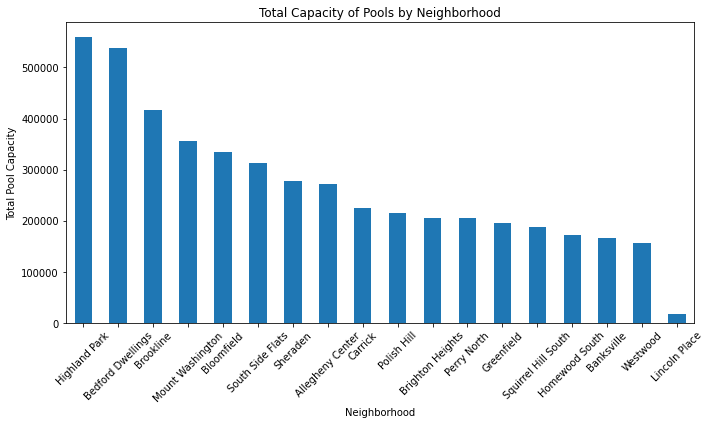

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Only consider pools, not spray parks
pools_only = pools_data[pools_data['type'] == 'Pool']

#Get the total capacity per neighborhood
neighborhood_capacity = pools_only.groupby('neighborhood')['capacity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
neighborhood_capacity.plot(kind='bar')
plt.title('Total Capacity of Pools by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Pool Capacity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

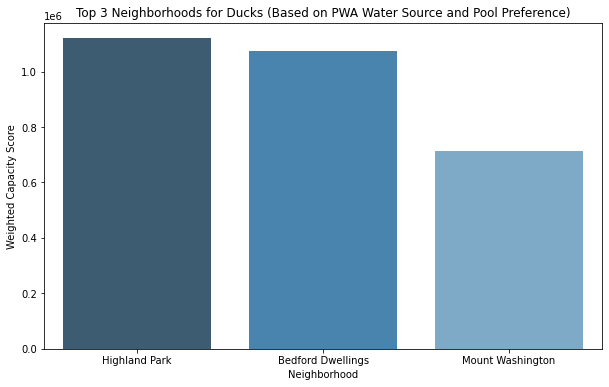

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './pittsburgh_pools.csv'
pools_data = pd.read_csv(file_path)

# Filter out the pools that are managed by PWSA
pwa_pools_index = pools_data['water_source'] == 'Pittsburgh Water and Sewer Authority'
pools_data.loc[pwa_pools_index, 'type_score'] = pools_data.loc[pwa_pools_index, 'type'].apply(lambda x: 2 if x == 'Pool' else 1)

# By summing up the capacity of pools and get the total score for each neighborhood m
# Multiply the capacity by the type_score, which is give more weight to pools than spray parks
pools_data.loc[pwa_pools_index, 'weighted_capacity_score'] = pools_data.loc[pwa_pools_index, 'capacity'] * pools_data.loc[pwa_pools_index, 'type_score']

# Sum the scores
neighborhood_scores = pools_data[pwa_pools_index].groupby('neighborhood').agg({
    'weighted_capacity_score': 'sum'
}).reset_index()

top_neighborhoods_for_ducks = neighborhood_scores.sort_values(by='weighted_capacity_score', ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='neighborhood', y='weighted_capacity_score', data=top_neighborhoods_for_ducks, palette="Blues_d")
plt.title('Top 3 Neighborhoods for Ducks (Based on PWA Water Source and Pool Preference)')
plt.xlabel('Neighborhood')
plt.ylabel('Weighted Capacity Score')
plt.show()

Distribution of Water Sources: Since water quality is critical to duck habitat, we first examined the distribution of the different water sources that supply water to the pond. The water source distribution histogram gave us a clear picture of the extent of the distribution of the "Pittsburgh Water and Sewer Authority" water sources, which we identified as the most beneficial to the ducks.

Pool Capacity: Next, we analyzed the total capacity of the pools in each community. Since larger pools support more aquatic life and provide a better living environment for ducks, a bar graph of total pool capacity is important.

In [ ]:
Pools Preferred Over Spray Parks: We recognize that pools are better for ducks than spray parks, which spray water in a variety of ways that can cause stress or injury to ducks, especially younger or smaller ducks. Because the pools always have water and are much larger, we used a scoring system. We created a weighted capacity score to emphasize the superiority of pools over spray parks and then identified the top three neighborhoods with the highest scores.